In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#!pip insall tweepy - install tweepy with pip
#conda install -c conda-forge tweepy --> install tweepy for anaconda
# conda install -c conda-forge/label/cf201901 tweepy --> install tweepy for anaconda
import tweepy, codecs


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
tweets = api.search(q = "#datascience", lang = "en", count = 5000)

In [4]:
import pandas as pd
def hashtag_df(tweets):
    id_list = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweets]
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["retweeted"] = [tweet.retweeted for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["source"] = [tweet.source for tweet in tweets]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweets]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweets]
    df["user_location"] = [tweet.author.location for tweet in tweets]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweets]
    
    return df

In [5]:
df = hashtag_df(tweets)

In [6]:
df = hashtag_df(tweets)

#convert all letters to the same size (large, small transformation)
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

#sremoving numbers
df['text'] = df['text'].str.replace('\d','')

#stopwords
#conda install -c anaconda nltk  --> for anaconda
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
#conda install -c conda-forge textblob  --> for anaconda
from textblob import Word
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#npunctuations
df['text'] = df['text'].str.replace('rt','')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df["text"]

0     check gig fiverr design responsive wordpress w...
1      mbilaldev check gig fiverr develop stunning r...
2     check gig fiverr develop stunning react ui htt...
3      gp_pulipaka machine learning work bigdata ana...
4      gp_pulipaka machine learning work bigdata ana...
                            ...                        
95     rweekly_live new rquery december winvectorllc...
96     gp_pulipaka sparse convnets efficient inferen...
97     gp_pulipaka tensorflow implementation deep sp...
98     kirkdborne page pdf datascience cheat sheet c...
99     kirkdborne page pdf datascience cheat sheet c...
Name: text, Length: 100, dtype: object

# Twitter Santiment Analysis

In [68]:
df

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1203405532834541571,reason fall love samsung galaxy screen better ...,2019-12-07 20:06:51,False,0,Twitter for iPad,hljoanie,134,kitchener,"[{'text': 'Samsung', 'indices': [40, 48]}, {'t...",0.333333,Pozitif
1,1203405230735417344,lifx would try samsung fold httpstcorvopwnsey,2019-12-07 20:05:39,False,1,Twitter for iPhone,Internati0nal1,94,"Melbourne, Victoria","[{'text': 'samsung', 'indices': [28, 36]}]",0.000000,Notr
2,1203405110040317955,samsung galaxy triple camera system allows sho...,2019-12-07 20:05:11,False,0,Hootsuite Inc.,UnlockedMobiles,1040,"Solihull, B90 8AG, UK","[{'text': 'Samsung', 'indices': [4, 12]}, {'te...",0.000000,Notr
3,1203404807479922688,slaimzy_ uhhmoonlight xhymns samsung,2019-12-07 20:03:58,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [32, 40]}]",0.000000,Notr
4,1203404802480316416,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:57,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
5,1203404712155987968,wtflona uhhhadi thefnbrpiug uhhmoonlight samsung,2019-12-07 20:03:36,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [45, 53]}]",0.000000,Notr
6,1203404711426064384,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:36,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
7,1203404619415556096,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:14,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
8,1203404561857298432,come fare backup completo android sul pc senza...,2019-12-07 20:03:00,False,0,Buffer,TecnoWizBlog,210,Italia,"[{'text': 'backup', 'indices': [85, 92]}, {'te...",0.000000,Notr
9,1203404511945134081,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:02:48,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr


In [69]:
from textblob import TextBlob

In [70]:

def santiment_score(df):

    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_skoru = textB.sentiment.polarity
        df.set_value(i, 'sentiment_score', sentiment_skoru)
        
        if sentiment_skoru <0.00:
            emotion_class = 'Negatif'
            df.set_value(i, 'emotion_class', emotion_class )

        elif sentiment_skoru >0.00:
            emotion_class = 'Pozitif'
            df.set_value(i, 'emotion_class', emotion_class )

        else:
            emotion_class = 'Notr'
            df.set_value(i, 'emotion_class', emotion_class )
            
    return df 

In [71]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1203405532834541571,reason fall love samsung galaxy screen better ...,2019-12-07 20:06:51,False,0,Twitter for iPad,hljoanie,134,kitchener,"[{'text': 'Samsung', 'indices': [40, 48]}, {'t...",0.333333,Pozitif
1,1203405230735417344,lifx would try samsung fold httpstcorvopwnsey,2019-12-07 20:05:39,False,1,Twitter for iPhone,Internati0nal1,94,"Melbourne, Victoria","[{'text': 'samsung', 'indices': [28, 36]}]",0.000000,Notr
2,1203405110040317955,samsung galaxy triple camera system allows sho...,2019-12-07 20:05:11,False,0,Hootsuite Inc.,UnlockedMobiles,1040,"Solihull, B90 8AG, UK","[{'text': 'Samsung', 'indices': [4, 12]}, {'te...",0.000000,Notr
3,1203404807479922688,slaimzy_ uhhmoonlight xhymns samsung,2019-12-07 20:03:58,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [32, 40]}]",0.000000,Notr
4,1203404802480316416,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:57,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr


In [72]:
santiment_score(df)

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1203405532834541571,reason fall love samsung galaxy screen better ...,2019-12-07 20:06:51,False,0,Twitter for iPad,hljoanie,134,kitchener,"[{'text': 'Samsung', 'indices': [40, 48]}, {'t...",0.333333,Pozitif
1,1203405230735417344,lifx would try samsung fold httpstcorvopwnsey,2019-12-07 20:05:39,False,1,Twitter for iPhone,Internati0nal1,94,"Melbourne, Victoria","[{'text': 'samsung', 'indices': [28, 36]}]",0.000000,Notr
2,1203405110040317955,samsung galaxy triple camera system allows sho...,2019-12-07 20:05:11,False,0,Hootsuite Inc.,UnlockedMobiles,1040,"Solihull, B90 8AG, UK","[{'text': 'Samsung', 'indices': [4, 12]}, {'te...",0.000000,Notr
3,1203404807479922688,slaimzy_ uhhmoonlight xhymns samsung,2019-12-07 20:03:58,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [32, 40]}]",0.000000,Notr
4,1203404802480316416,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:57,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
5,1203404712155987968,wtflona uhhhadi thefnbrpiug uhhmoonlight samsung,2019-12-07 20:03:36,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [45, 53]}]",0.000000,Notr
6,1203404711426064384,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:36,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
7,1203404619415556096,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:14,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
8,1203404561857298432,come fare backup completo android sul pc senza...,2019-12-07 20:03:00,False,0,Buffer,TecnoWizBlog,210,Italia,"[{'text': 'backup', 'indices': [85, 92]}, {'te...",0.000000,Notr
9,1203404511945134081,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:02:48,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr


In [73]:
df.groupby("emotion_class").count()["id"]

emotion_class
Notr       14
Pozitif     1
Name: id, dtype: int64

In [74]:
emotion_freq = df.groupby("emotion_class").count()["id"]

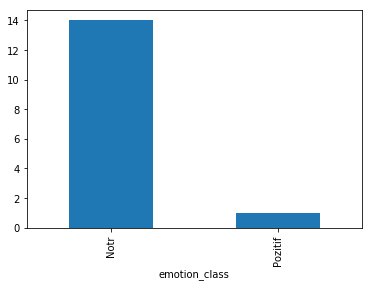

In [75]:
emotion_freq.plot.bar(x = "emotion_class",y = "id");

In [76]:
Atweets = api.search(q = "#apple", lang = "en")

In [77]:
df = hashtag_df(tweets)

In [78]:
#convert all letters to the same size (large, small transformation)
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

#sremoving numbers
df['text'] = df['text'].str.replace('\d','')

#stopwords
#conda install -c anaconda nltk  --> for anaconda
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
#conda install -c conda-forge textblob  --> for anaconda
from textblob import Word
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#npunctuations
df['text'] = df['text'].str.replace('rt','')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
santiment_score(df)

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1203405098141061122,check gig fiverr design responsive wordpress w...,2019-12-07 20:05:08,False,0,Twitter Web Client,mBilalDev,92,"sialkot punjab, Pakistan","[{'text': 'reactjs', 'indices': [106, 114]}]",0.000000,Notr
1,1203405044516818946,mbilaldev check gig fiverr develop stunning r...,2019-12-07 20:04:55,False,1,BoakyeTweetsBot,BoakyeTweets,327,"Miami, FL","[{'text': 'reactjs', 'indices': [93, 101]}, {'...",0.500000,Pozitif
2,1203405022022774784,check gig fiverr develop stunning react ui htt...,2019-12-07 20:04:50,False,1,Twitter Web Client,mBilalDev,92,"sialkot punjab, Pakistan","[{'text': 'reactjs', 'indices': [78, 86]}, {'t...",0.500000,Pozitif
3,1203404706535673857,gp_pulipaka machine learning work bigdata ana...,2019-12-07 20:03:34,False,22,BoakyeTweetsBot,BoakyeTweets,327,"Miami, FL","[{'text': 'BigData', 'indices': [45, 53]}, {'t...",0.000000,Notr
4,1203404684087713795,gp_pulipaka machine learning work bigdata ana...,2019-12-07 20:03:29,False,22,TheBigDataBot,thomashilbig2,1469,,"[{'text': 'BigData', 'indices': [45, 53]}, {'t...",0.000000,Notr
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1203400282996121600,rweekly_live new rquery december winvectorllc...,2019-12-07 19:46:00,False,2,rstatsretweetingtool,rstatstweet,4739,,"[{'text': 'rstats', 'indices': [69, 76]}, {'te...",0.136364,Pozitif
96,1203400281846951941,gp_pulipaka sparse convnets efficient inferen...,2019-12-07 19:45:59,False,8,rstatsretweetingtool,rstatstweet,4739,,"[{'text': 'BigData', 'indices': [58, 66]}, {'t...",0.000000,Notr
97,1203400278646644736,gp_pulipaka tensorflow implementation deep sp...,2019-12-07 19:45:59,False,7,rstatsretweetingtool,rstatstweet,4739,,"[{'text': 'TensorFlow', 'indices': [19, 30]}, ...",0.000000,Notr
98,1203400069967425536,kirkdborne page pdf datascience cheat sheet c...,2019-12-07 19:45:09,False,78,RTML,TheCuriousLuke,3522,Switzerland,"[{'text': 'DataScience', 'indices': [35, 47]},...",0.000000,Notr


In [80]:
df.groupby("emotion_class").count()["id"]

emotion_class
Negatif     2
Notr       60
Pozitif    38
Name: id, dtype: int64

In [81]:
emotion_freq = df.groupby("emotion_class").count()["id"]

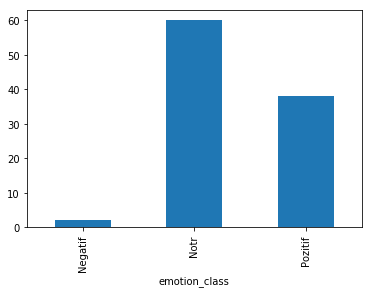

In [82]:
emotion_freq.plot.bar(x = "emotion_class",y = "id");

marka karsılasfor #samsung

In [83]:
Stweets = api.search(q = "#samsung", lanf = "eng")

In [84]:
df = hashtag_df(Stweets)

In [85]:
#convert all letters to the same size (large, small transformation)
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

#sremoving numbers
df['text'] = df['text'].str.replace('\d','')

#stopwords
#conda install -c anaconda nltk  --> for anaconda
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
#conda install -c conda-forge textblob  --> for anaconda
from textblob import Word
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#npunctuations
df['text'] = df['text'].str.replace('rt','')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmeterdogan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
santiment_score(df)

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1203405532834541571,reason fall love samsung galaxy screen better ...,2019-12-07 20:06:51,False,0,Twitter for iPad,hljoanie,134,kitchener,"[{'text': 'Samsung', 'indices': [40, 48]}, {'t...",0.333333,Pozitif
1,1203405230735417344,lifx would try samsung fold httpstcorvopwnsey,2019-12-07 20:05:39,False,1,Twitter for iPhone,Internati0nal1,94,"Melbourne, Victoria","[{'text': 'samsung', 'indices': [28, 36]}]",0.000000,Notr
2,1203405110040317955,samsung galaxy triple camera system allows sho...,2019-12-07 20:05:11,False,0,Hootsuite Inc.,UnlockedMobiles,1040,"Solihull, B90 8AG, UK","[{'text': 'Samsung', 'indices': [4, 12]}, {'te...",0.000000,Notr
3,1203404807479922688,slaimzy_ uhhmoonlight xhymns samsung,2019-12-07 20:03:58,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [32, 40]}]",0.000000,Notr
4,1203404802480316416,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:57,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
5,1203404712155987968,wtflona uhhhadi thefnbrpiug uhhmoonlight samsung,2019-12-07 20:03:36,False,0,Twitter Web App,Tage24313176,1,,"[{'text': 'Samsung', 'indices': [45, 53]}]",0.000000,Notr
6,1203404711426064384,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:36,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
7,1203404619415556096,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:03:14,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr
8,1203404561857298432,come fare backup completo android sul pc senza...,2019-12-07 20:03:00,False,0,Buffer,TecnoWizBlog,210,Italia,"[{'text': 'backup', 'indices': [85, 92]}, {'te...",0.000000,Notr
9,1203404511945134081,برای سفارش و قیمت دایرکت لطفا nokia lg samsung...,2019-12-07 20:02:48,False,0,Instagram,mikailkurdish,300,جمهوری اسلامی ایران,"[{'text': 'nokia', 'indices': [33, 39]}, {'tex...",0.000000,Notr


In [87]:
df.groupby("emotion_class").count()["id"]

emotion_class
Notr       14
Pozitif     1
Name: id, dtype: int64

In [88]:
emotion_freq = df.groupby("emotion_class").count()["id"]

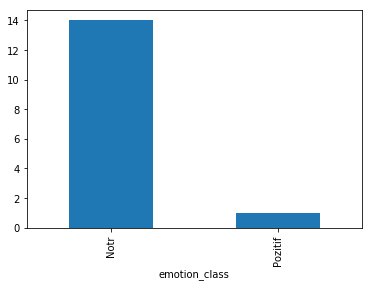

In [89]:
emotion_freq.plot.bar(x = "emotion_class",y = "id");